In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2023-04-02 23:53:18.361081: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 23:53:18.440459: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 23:53:18.441718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 23:53:19.653851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# importing dataset from keras
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train),len(X_test),sep="   ")

60000   10000


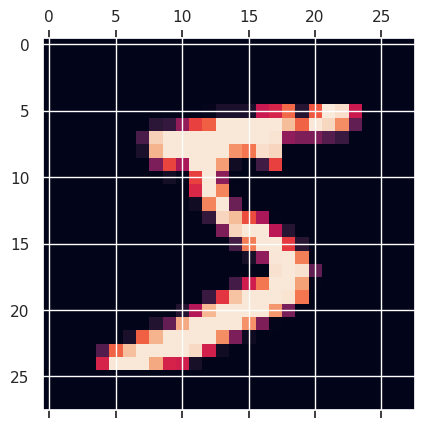

In [4]:
sns.set()
plt.matshow(X_train[0])

In [5]:
y_train[0]

5

Actual value :  [0 4 1]


<Figure size 500x300 with 0 Axes>

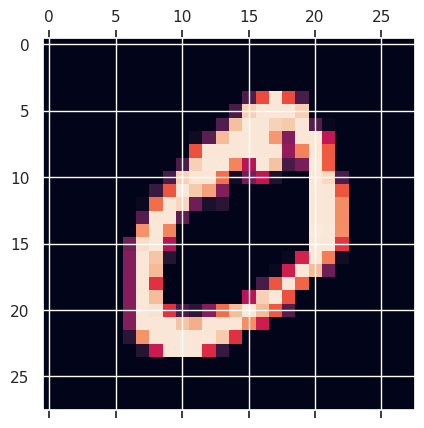

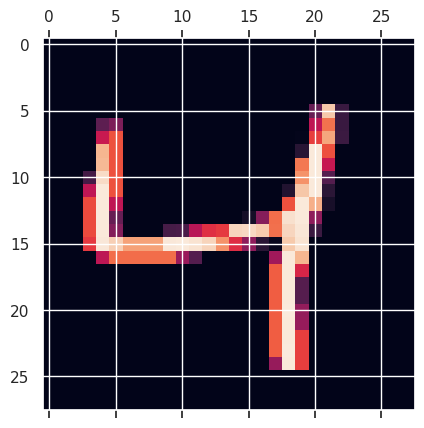

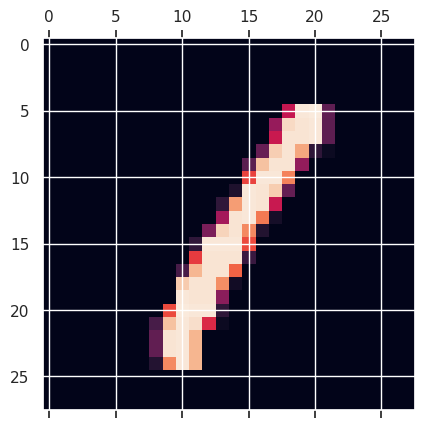

In [6]:
sns.set()
print("Actual value : ",y_train[1:4])
plt.figure(figsize=(5,3))
for i in range(1,4):
    plt.matshow(X_train[i])
plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flatten = X_train.reshape(60000,28*28)
X_train_flatten.shape

(60000, 784)

In [10]:
X_train_flatten[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Creating simple Neural Network

In [11]:
model = keras.Sequential([
    keras.layers.Dense(250,input_shape=(784,),activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2093 - accuracy: 0.9379
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0869 - accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0594 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9889


In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_test_flatten = X_test.reshape(10000,28*28)
X_test_flatten.shape

(10000, 784)

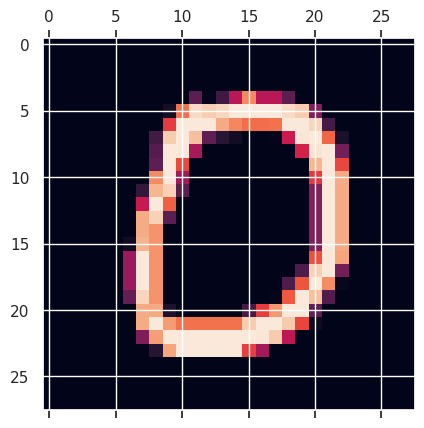

In [14]:
plt.matshow(X_test[10])

In [15]:
y_pred = model.predict(X_test_flatten)
y_pred[10]

313/313 [==============================] - 1s 2ms/step


array([1.        , 0.00217589, 0.89790744, 0.00127421, 0.00535387,
       0.03852892, 0.85961175, 0.06939122, 0.14179012, 0.9925917 ],
      dtype=float32)

In [16]:
np.argmax(y_pred[10])

0

In [17]:
# argmax is very impt method in DL while visualisation

In [18]:
y_pred_labels = [np.argmax(x) for x in y_pred]
print(f"y_pred :- {y_pred_labels[:5]} and y_test :- {y_test[:5]}")

y_pred :- [7, 2, 1, 0, 4] and y_test :- [7 2 1 0 4]


In [19]:
cnm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cnm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    0,    1,    1,    1,    0,    1,    4],
       [   0, 1122,    2,    2,    0,    1,    2,    0,    5,    1],
       [   3,    0, 1008,    2,    1,    0,    2,    2,   13,    1],
       [   0,    0,    5,  989,    0,    2,    0,    1,    7,    6],
       [   2,    0,    7,    0,  952,    0,    2,    3,    0,   16],
       [   2,    1,    0,   19,    0,  848,    5,    0,    6,   11],
       [   6,    2,    0,    0,   11,    2,  935,    0,    2,    0],
       [   1,    2,   15,    6,    0,    0,    0,  966,    7,   31],
       [   4,    1,    1,    2,    5,    2,    1,    1,  953,    4],
       [   2,    2,    0,    1,    3,    2,    0,    1,    2,  996]],
      dtype=int32)>

Text(46.25, 0.5, 'Truth')

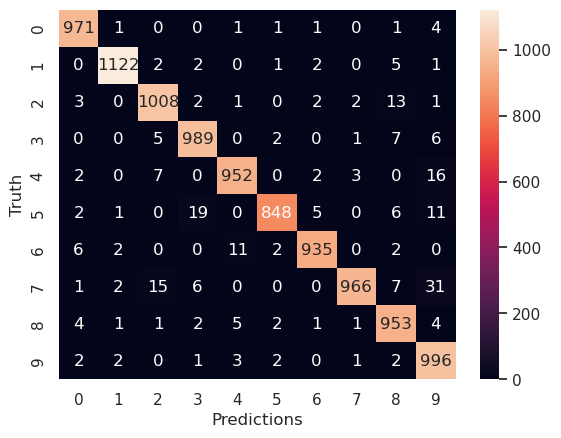

In [20]:
sns.heatmap(cnm,annot=True,fmt='d')  # fmt = 'd' is set for decimal value annotation
plt.xlabel("Predictions")
plt.ylabel("Truth")

### From above heat-map, we can say that , a. For 972 times , truth was '0' and model predicted to be 0, while 4 times truth was 9 and model predicted to be 0, simultaneously for other values also.

<Figure size 400x300 with 0 Axes>

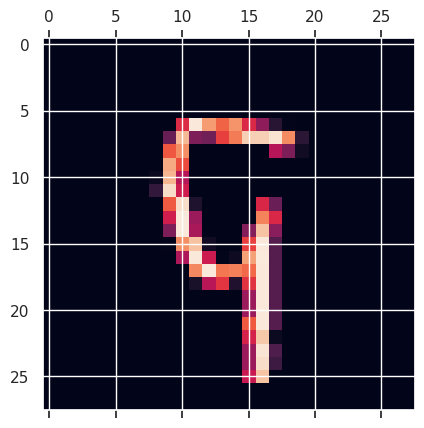

Actual Data value
y_test at 62 index : 9
Predicted Data value
y_pred at 62 index : 9


In [21]:
plt.figure(figsize=(4,3))
plt.matshow(X_test[62])
plt.show()

print(f"Actual Data value\ny_test at 62 index : {y_test[62]}")
print(f"Predicted Data value\ny_pred at 62 index : {y_pred_labels[62]}")

In [22]:
# Evaluation of Testing Dataset

model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9741


[0.09822378307580948, 0.9740999937057495]

In [23]:
# Evaluation of Training Dataset

model.evaluate(X_train_flatten,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9897


[0.03141160309314728, 0.9896500110626221]

In [24]:
import joblib
joblib.dump(model,'basic_neural_network')

['basic_neural_network']

## Verification of Model

In [25]:
test_case1 = X_test_flatten[101]
test_case1_reshape = test_case1.reshape(-1,784)
test_case1_reshape

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [26]:
test_model = joblib.load('basic_neural_network')

In [27]:
test_pred = test_model.predict(test_case1_reshape)

1/1 [==============================] - 0s 78ms/step


In [28]:
test_pred.argmax()

0

In [29]:
y_test[101]

0

In [30]:
y_pred_labels[101]

0